**TASK 3**

AUTHOR : SOWMIYA S

Objective:To build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing the Given Dataset

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Data cleaning and exploratory data analysis (EDA)

In [ ]:
data.shape

(4521, 17)

There are 4521 observations across 17 variables.

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

These are the columns(Variables) in the dataset.

In [ ]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


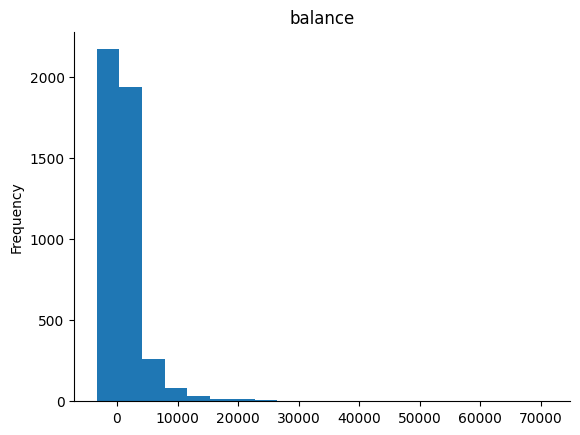

In [ ]:
#Histogram of 'Balance'
from matplotlib import pyplot as plt
data['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

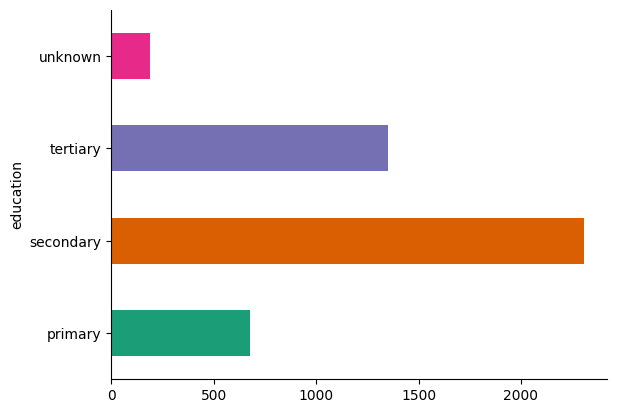

In [ ]:
#Barplot of Education
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = data.drop(columns=['y'])
Y = data['y']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

# Converting the scaled data to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 5],
    'max_features': [50,30,10]
}

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Create a DecisionTreeClassifier
cl=DecisionTreeClassifier()
cl.fit(X_train_scaled_df,Y_train)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(cl, param_grid, cv=5)
grid_search.fit(X_train_scaled_df, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': [50, 30, 10],
                         'min_samples_leaf': [1, 4, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Get the best estimator and best parameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score= grid_search.best_score_

In [ ]:
print("Best hyperparameters:", best_params)
print("Best estimator:", best_classifier)
print("Best score:", best_score)

Best hyperparameters: {'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best estimator: DecisionTreeClassifier(max_depth=5, max_features=30, min_samples_leaf=4)
Best score: 0.8963360129581858


In [ ]:
# Train the DecisionTreeClassifier on the full training set using the best hyperparameters
best_classifier.fit(X_train_scaled_df, Y_train)

DecisionTreeClassifier(max_depth=5, max_features=30, min_samples_leaf=4)

In [ ]:
# Evaluate the model's performance on the test set
y_pred = best_classifier.predict(X_test_scaled_df)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8975681650700074


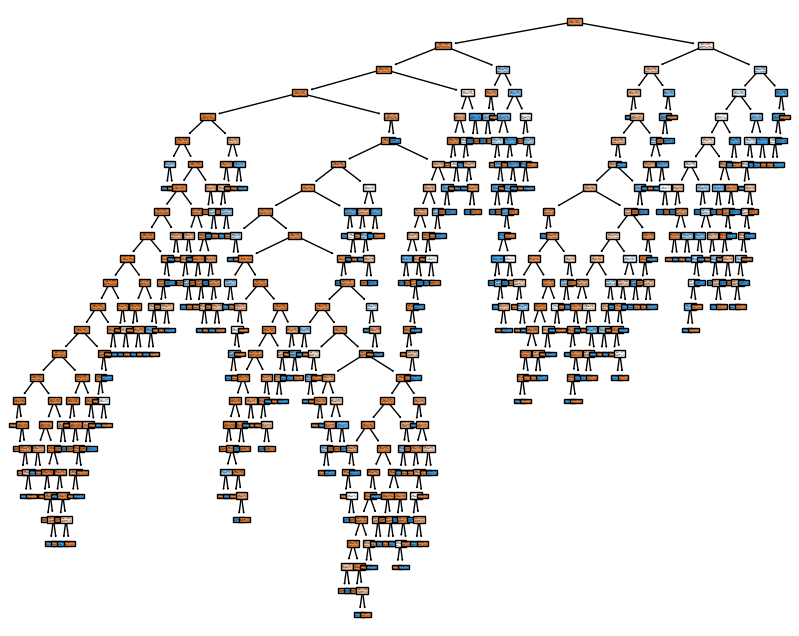

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(cl, filled=True)
plt.show()